# Tool to extract usefull information from mlperf trace

In [1]:
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import json
import os
import seaborn as sns
from operator import itemgetter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

figsize=(10, 5)
font=10

plt.figure(dpi=600)
plt.rc('xtick', labelsize=font) 
plt.rc('font', size=font)
sns.set(font_scale=1.4, style="whitegrid");

<Figure size 3600x2400 with 0 Axes>

In [2]:
def trace_to_df(fname):
    with open(fname, "r") as f:
        print(f)
        j = json.load(f)
    if type(j) == dict:
        j = j['traceEvents']
        
    result = []
    for item in j:
        name = item['name']
        if name not in ["Latency", "Sample", "QuerySamplesComplete", "IssueQuery"]:
            continue

        args = item.get('args')
        d = {"ts": item['ts'], "name": name, "dur": item.get("dur")}

        if name == "Latency":
            d["issue_delay"] = args["issue_delay"] /1e9
            d["issue_to_done"] = args["issue_to_done"] / 1e9
            result.append(d)
        elif name == "Sample":
            if args:
                d["issue_start_ns"] = args["issue_start_ns"]
                d["complete_ns"] = args["complete_ns"]
                d["issue_to_done"] = (args["complete_ns"] - args["issue_start_ns"]) / 1e9
                result.append(d)
        elif name == "QuerySamplesComplete":
            result.append(d)
        elif name == "IssueQuery":
            result.append(d)

    df = pd.DataFrame(result)
    df = df.sort_values(by=["ts"])
    return df

BINS = 10

In [3]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 1000000, 100)

In [4]:
df = trace_to_df('/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-MS-1-1/mlperf_log_trace.json')
df.describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-MS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


,ts,dur,issue_start_ns,complete_ns,issue_to_done
count,1.200000e+04,4000.000000,8000.000000,8.000000e+03,8000.000000
mean,3.085112e+07,313.384112,108356.817500,3.151464e+09,3.151356
std,1.865591e+07,712.319408,22833.061811,3.080335e+08,0.308034
min,2.161553e+05,3.540000,4247.000000,1.154096e+09,1.153988
25%,1.459116e+07,8.004750,102172.250000,3.126227e+09,3.126121
50%,3.083069e+07,63.434000,108758.500000,3.216538e+09,3.216424
75%,4.702619e+07,201.909750,115068.750000,3.290350e+09,3.290230
max,6.529516e+07,10868.491000,808575.000000,3.527791e+09,3.527672


In [5]:
df["name"].unique()

array(['Sample', 'IssueQuery', 'QuerySamplesComplete'], dtype=object)

In [6]:
df

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
100,2.161553e+05,Sample,NaN,107888.0,1.154096e+09,1.153988
101,2.161553e+05,Sample,NaN,107888.0,1.154096e+09,1.153988
102,2.161553e+05,Sample,NaN,107888.0,1.154096e+09,1.153988
103,2.161553e+05,Sample,NaN,107888.0,1.154096e+09,1.153988
0,2.162641e+05,IssueQuery,143.544,NaN,NaN,NaN
...,...,...,...,...,...,...
11979,6.529247e+07,QuerySamplesComplete,5.558,NaN,NaN,NaN
11984,6.529438e+07,QuerySamplesComplete,3.678,NaN,NaN,NaN
11989,6.529466e+07,QuerySamplesComplete,5.766,NaN,NaN,NaN
11994,6.529491e+07,QuerySamplesComplete,5.652,NaN,NaN,NaN


In [7]:
df1 = df[df["name"].isin(["Sample"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
100,2.161553e+05,Sample,NaN,107888.0,1.154096e+09,1.153988
101,2.161553e+05,Sample,NaN,107888.0,1.154096e+09,1.153988
102,2.161553e+05,Sample,NaN,107888.0,1.154096e+09,1.153988
103,2.161553e+05,Sample,NaN,107888.0,1.154096e+09,1.153988
108,2.211553e+05,Sample,NaN,86049.0,1.179410e+09,1.179324
...,...,...,...,...,...,...
11983,6.261616e+07,Sample,NaN,93096.0,2.678225e+09,2.678132
11996,6.262116e+07,Sample,NaN,114164.0,2.674004e+09,2.673890
11995,6.262116e+07,Sample,NaN,114164.0,2.674004e+09,2.673890
11998,6.262116e+07,Sample,NaN,114164.0,2.674004e+09,2.673890


In [8]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,2.162641e+05,IssueQuery,143.544,NaN,NaN,NaN
1,2.212417e+05,IssueQuery,91.875,NaN,NaN,NaN
2,2.263043e+05,IssueQuery,161.047,NaN,NaN,NaN
3,2.312703e+05,IssueQuery,155.444,NaN,NaN,NaN
4,2.362685e+05,IssueQuery,136.485,NaN,NaN,NaN
...,...,...,...,...,...,...
11475,6.239127e+07,IssueQuery,172.745,NaN,NaN,NaN
11486,6.247125e+07,IssueQuery,1114.942,NaN,NaN,NaN
11487,6.247628e+07,IssueQuery,217.708,NaN,NaN,NaN
11508,6.261625e+07,IssueQuery,205.186,NaN,NaN,NaN


In [9]:
df1 = df[df["name"].isin(["Latency"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done


In [10]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
104,1.370253e+06,QuerySamplesComplete,33.369,NaN,NaN,NaN
110,1.400566e+06,QuerySamplesComplete,21.503,NaN,NaN,NaN
116,1.463898e+06,QuerySamplesComplete,10.491,NaN,NaN,NaN
121,1.479253e+06,QuerySamplesComplete,17.223,NaN,NaN,NaN
126,1.485105e+06,QuerySamplesComplete,13.934,NaN,NaN,NaN
...,...,...,...,...,...,...
11979,6.529247e+07,QuerySamplesComplete,5.558,NaN,NaN,NaN
11984,6.529438e+07,QuerySamplesComplete,3.678,NaN,NaN,NaN
11989,6.529466e+07,QuerySamplesComplete,5.766,NaN,NaN,NaN
11994,6.529491e+07,QuerySamplesComplete,5.652,NaN,NaN,NaN


# Multistream scenario

In [11]:
# BINS=12
# color=["blue","green","yellow","red","orange","grey"]
# SCEN=[
#     'none-resnet-1-32-MS-1-1',
#       'none-resnet-2-32-MS-1-1',
#             'none-resnet-4-32-MS-1-1',
#            'none-resnet-8-32-MS-1-1',
#       'none-resnet-16-32-MS-1-1',
#       'none-resnet-32-32-MS-1-1'
# ]
# x=0
# for add in SCEN:
#     df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
#     df1 = df[df["name"].isin(["IssueQuery"])]
#     print(df1)
# #     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# #     ax.set_title('IssueQuery duration (usec)');
# #     x=x+1
# #     plt.show()

# # df1['delta'].describe()

In [12]:
# # for SingleStream
# if True:
#     df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     plt.show()
#     ax = df1['dur'].plot(figsize=figsize)
#     ax.set(ylim=(0, 600))
#     ax.set_title('Individual inference time (usec)');

In [13]:
# BINS=12
# color=["blue","green","yellow","red","orange","grey"]
# for batch in ['1']:
#     SCEN=[
#     'none-resnet-1-32-MS-1-1',
#       'none-resnet-2-32-MS-1-1',
#             'none-resnet-4-32-MS-1-1',
#            'none-resnet-8-32-MS-1-1',
#       'none-resnet-16-32-MS-1-1',
#       'none-resnet-32-32-MS-1-1'
# ]
#     x=0
#     for add in SCEN:
#         df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
#         df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#         print(max(df1['dur']))
#         print(np.median(df1['dur']))
#         print(np.mean(df1['dur']))
#     #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     #     ax.set_title('Inference time (usec)');
#     #     x = x+1
#     #     plt.show()

#         # Draw the density plot
#         sns.distplot(df1['dur'], hist = False, kde = True,
#                      kde_kws = {'linewidth': 3},
#                      label = SCEN[x])
#         x=x+1

#     # Plot formatting
#     plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
#     plt.title('Inference time (usec) -- batch'+str(batch))
#     plt.xlabel('time (usec)')
#     plt.ylabel('Density')
#     plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-MS/none-resnet-1-32-MS-5-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
7.854429161
6.6956727275
5.602550067425961
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-MS/none-resnet-2-32-MS-6-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
7.191531883
6.1123544445
5.539833777909984
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-MS/none-resnet-4-32-MS-6-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
8.723917826
6.057180108
5.610351488028512
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-MS/none-resnet-8-32-MS-6-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
8.81067715
5.817964682
5.386767445235
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-MS/none-resnet-16-32-MS-7-1/mlp

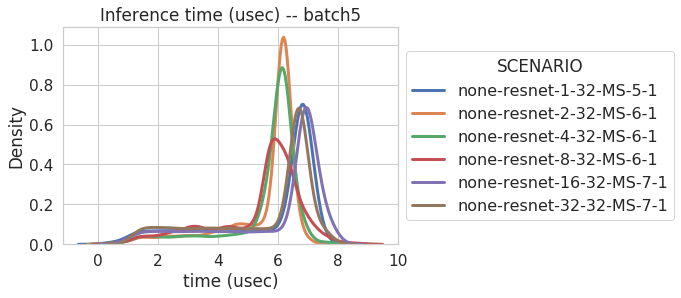

In [53]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['5']:
    SCEN=[
    'none-resnet-1-32-MS-5-1',
      'none-resnet-2-32-MS-6-1',
            'none-resnet-4-32-MS-6-1',
           'none-resnet-8-32-MS-6-1',
      'none-resnet-16-32-MS-7-1',
      'none-resnet-32-32-MS-7-1'
]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-MS/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(max(df1['issue_to_done']))
        print(np.median(df1['issue_to_done']))
        print(np.mean(df1['issue_to_done']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = SCEN[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('Inference time (usec) -- batch'+str(batch))
    plt.xlabel('time (usec)')
    plt.ylabel('Density')
    plt.show()

In [34]:
# BINS=12
# color=["blue","green","yellow","red","orange","grey"]
# for batch in ['32']:
#     SCEN=[
#     'none-resnet-1-32-MS-1-1',
#       'none-resnet-2-32-MS-1-1',
#             'none-resnet-4-32-MS-1-1',
#            'none-resnet-8-32-MS-1-1',
#       'none-resnet-16-32-MS-1-1',
#       'none-resnet-32-32-MS-1-1'
# ]
#     x=0
#     for add in SCEN:
#         df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
#         df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#         df1.reset_index(drop=True,inplace=True)
#         ax = df1['dur'].plot(figsize=figsize, color=color[x],label = SCEN[x])
#         ax.set_title('Individual inference time (usec)');
#         ax.set(ylim=(0, 150))
#         x=x+1
#     plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
#     plt.show()
#     plt.xlabel('#QuerySamples')

In [536]:
df1 = df[df["name"].isin(["Sample"])]
len(df1)

24576

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-MS/none-resnet-1-32-MS-5-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-MS/none-resnet-2-32-MS-6-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
12000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-MS/none-resnet-4-32-MS-6-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
12000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-MS/none-resnet-8-32-MS-6-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
12000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-MS/none-resnet-16-32-MS-7-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
14000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detecti

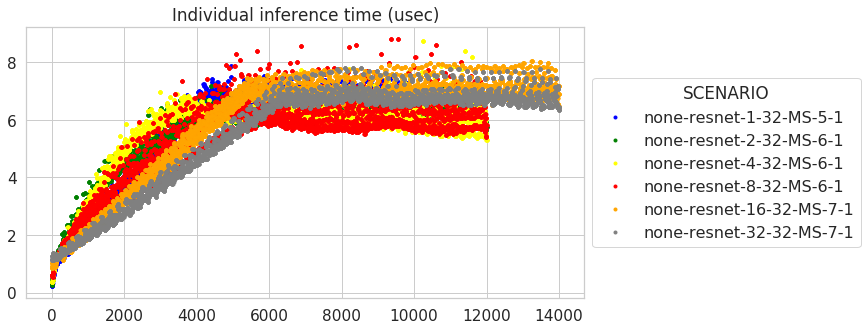

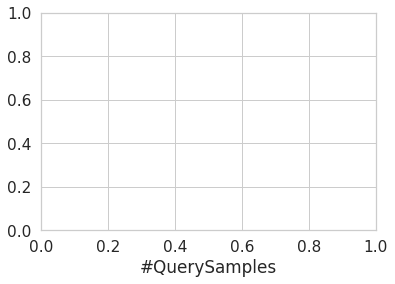

In [52]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['5']:
    SCEN=[
    'none-resnet-1-32-MS-5-1',
      'none-resnet-2-32-MS-6-1',
            'none-resnet-4-32-MS-6-1',
           'none-resnet-8-32-MS-6-1',
      'none-resnet-16-32-MS-7-1',
      'none-resnet-32-32-MS-7-1'
]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-MS/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(len(df1))
        df1.reset_index(drop=True,inplace=True)
  
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = SCEN[x],marker='.', linestyle='none')
#         df1['issue_start_ns'] =  df1['issue_start_ns'] / 1e9
#         ax = df1['issue_start_ns'].plot(figsize=figsize, color=color[x],label = SCEN[x],marker='.', linestyle='none')
        ax.set_title('Individual inference time (usec)');
#         ax.set(ylim=(0, 150))
        x=x+1
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.show()
    plt.xlabel('#QuerySamples')

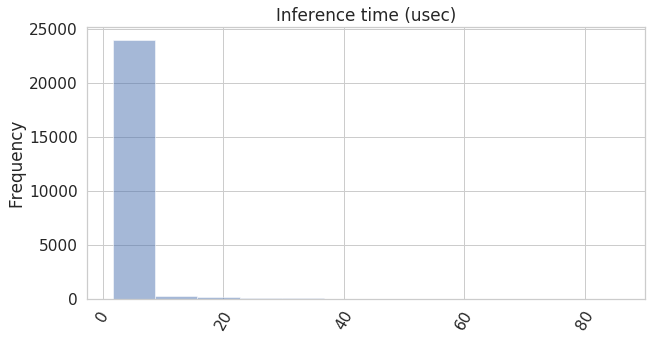

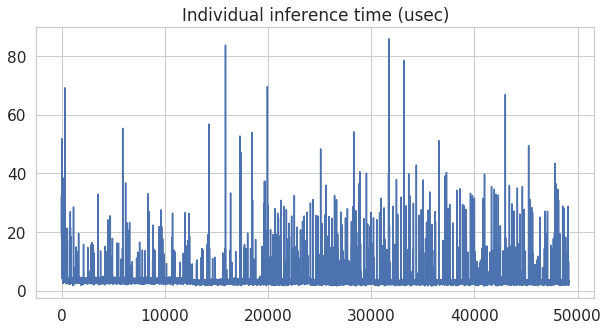

In [312]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Inference time (usec)');
#ax.set(xlim=(0, 25000))
plt.xticks(rotation=60)
plt.show()

ax = df1['dur'].plot(figsize=figsize)
ax.set_title('Individual inference time (usec)');
#ax.set(ylim=(0, 200))
plt.show()


# df1['issue_to_done'].describe()

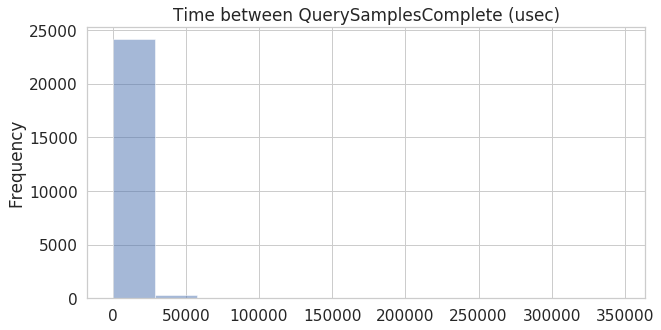

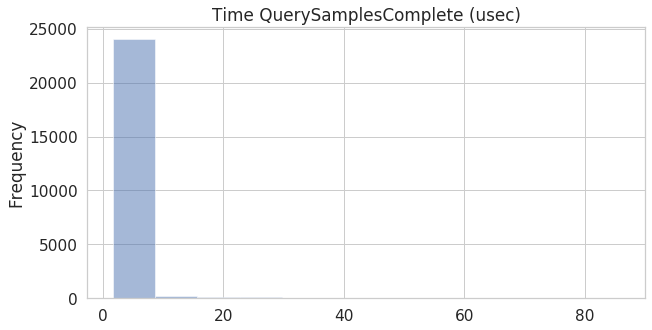

In [313]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1['delta'] = df1['ts'].diff()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between QuerySamplesComplete (usec)');
plt.show()

ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time QuerySamplesComplete (usec)');